<a href="https://colab.research.google.com/github/Nmloury/ML-Education/blob/main/projects/dl-for-coders/02_production_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gradio Pets

In [1]:
!pip install -Uqq fastai fastbook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
#imports
from fastbook import *
from fastai.vision.widgets import *

In [3]:
results = search_images_ddg('grizzly bear')
ims = results.attrgot('contentUrl')
len(ims)

200

In [4]:
# define dog breeds for classification
dog_breeds = 'pitbull', 'cattle dog', 'golden retriever', 'pug', 'weimaraner'
path = Path('dogs')

In [5]:
# download dog images
if not path.exists():
    path.mkdir()
for o in dog_breeds:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{o}')
    download_images(dest, urls=results)

In [6]:
# view image file paths
fns = get_image_files(path)
fns

(#940) [Path('dogs/pitbull/d2c44403-7fe3-4ec8-b753-6ae5daf9c88d.jpg'),Path('dogs/pitbull/5a96f6bc-22e0-424b-b27e-8a96699acf2b.jpg'),Path('dogs/pitbull/3c8abc24-f67b-4ff9-acf9-29ecc992a48c.jpg'),Path('dogs/pitbull/ef2be75e-f9c7-4576-ade2-003eb4023d44.png'),Path('dogs/pitbull/dd59c144-1f51-46ef-a046-246e1b8632e2.jpg'),Path('dogs/pitbull/e9400861-fda6-4601-bad5-59cd83f4d913.png'),Path('dogs/pitbull/93bc35d8-95d5-491f-ab99-f47366eb6a09.jpg'),Path('dogs/pitbull/65425cec-9606-43cc-b7e9-f0321002bd61.jpg'),Path('dogs/pitbull/6a65e650-8065-44b1-8c50-6b0773367340.jpg'),Path('dogs/pitbull/435f6b3d-2222-48f8-a599-ae21092185bb.jpg'),Path('dogs/pitbull/ea532abf-de38-4bea-9d66-2c23b55ead7c.jpg'),Path('dogs/pitbull/1491568f-5c93-4a29-9654-0914e6356585.jpg'),Path('dogs/pitbull/859268ea-a292-454f-af1d-38031aca70b8.jpg'),Path('dogs/pitbull/b5ea5283-5ded-4774-822a-1f31cda4a3ac.jpg'),Path('dogs/pitbull/0894bc19-2dc2-4ed7-bb56-5ff616802b8a.jpg'),Path('dogs/pitbull/0094a32c-bdb2-4576-8b05-efbe51494a85.jpg'),

In [7]:
# view failed image files
failed = verify_images(fns)
failed

(#14) [Path('dogs/pitbull/2cca736e-beb5-4732-b548-3aa32b8fd836.jpg'),Path('dogs/pitbull/05a9f98a-dcd4-4b86-a742-eee582179903.jpg'),Path('dogs/pitbull/fe4636a0-c8ca-4c9b-93a2-acbeb6257f9e.jpg'),Path('dogs/pitbull/584b0815-4d1a-4b7c-ad3a-577319300bc5.jpg'),Path('dogs/pitbull/e4c80324-24d6-49cc-b638-e9f393fa9200.jpg'),Path('dogs/cattle dog/e958d6b8-b0b9-4dc8-b0f4-2068c32eca04.jpg'),Path('dogs/pug/106ca0e3-3001-4903-8110-5c294274cdd5.jpg'),Path('dogs/pug/09c3b4cc-4af5-49a8-b0af-2a21fec63c2d.jpg'),Path('dogs/pug/27a84ede-b005-491e-8655-fa682b1f3a2c.jpg'),Path('dogs/pug/174fa1dc-62ab-43e5-99e1-16bba54fed55.jpg'),Path('dogs/pug/2f661643-42c1-4531-b386-ecd0710df1da.jpg'),Path('dogs/pug/a60cbf1f-3f10-4801-bd2c-746766dfe254.jpg'),Path('dogs/golden retriever/807ae6a3-9f7d-450d-8eb6-7a01f4f6445c.jpg'),Path('dogs/golden retriever/eea7a044-2f35-4f7d-b10d-2d8badfea090.jpg')]

In [8]:
#remove failed images
failed.map(Path.unlink);

In [9]:
##
dogs = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [10]:
dls = dogs.dataloaders(path)

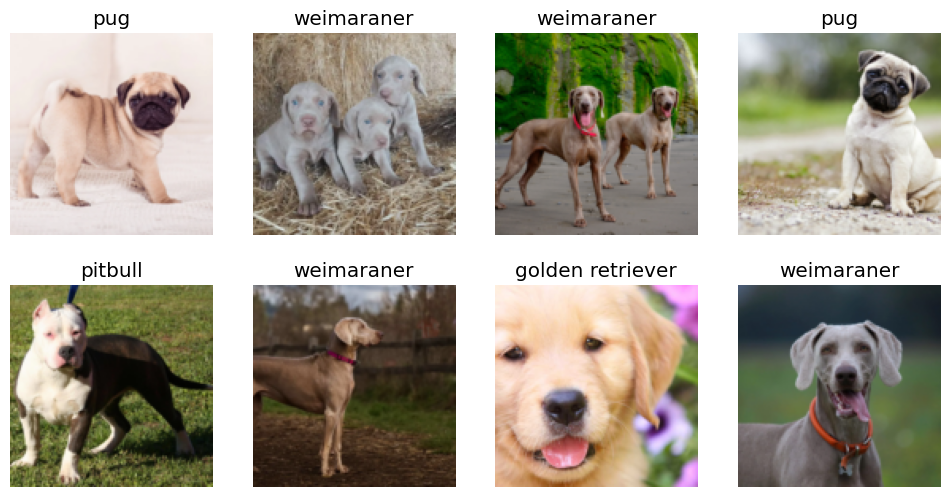

In [11]:
# Let's look at a few images
dls.valid.show_batch(max_n=8, nrows=2)

In [12]:
# Optionally add in some cropping and augmentation to our dataset
dogs = dogs.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = dogs.dataloaders(path)

In [13]:
# Fine tune the image classification model
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 81.0MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.214793,0.056903,0.016216,00:33


epoch,train_loss,valid_loss,error_rate,time
0,0.176165,0.055296,0.016216,00:34
1,0.124257,0.040862,0.010811,00:33
2,0.106023,0.051720,0.016216,00:32
3,0.087994,0.047164,0.016216,00:33


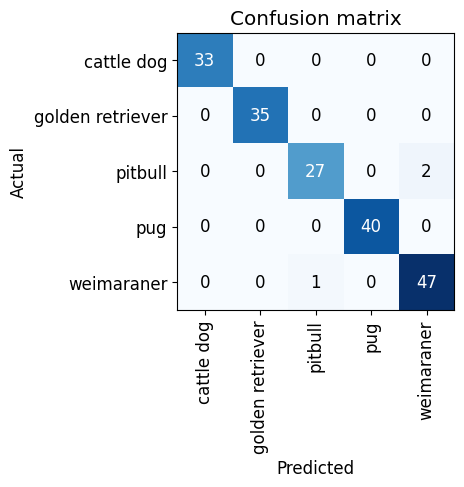

In [14]:
# Create confusion matrix to see where the model is making the most mistakes
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

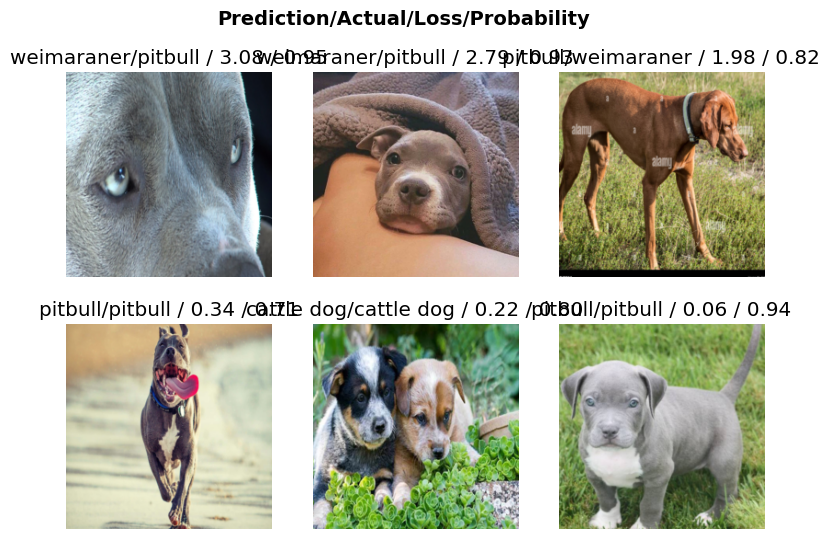

In [15]:
interp.plot_top_losses(6, nrows=2)

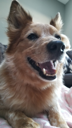

In [16]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [17]:
# export our model
learn.export()

In [20]:
# check our model file exists
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [19]:
print('hello world')

hello world
